# 对原始数据集进行预处理
首先将原始数据集csv文件的首列索引设置为datatime，然后将各个国家的负载、温度和风速相关的数据分开，依次生成以下五个国家的数据集：
+ 澳大利亚数据集 AT_data.csv
+ 瑞士数据集 CH_data.csv
+ 德国数据集 DE_data.csv
+ 荷兰数据集 NL_data.csv
+ 波兰数据集 PL_data.csv

预处理之后每个国家的数据集包括 首列索引，第二列负载数据，第三列温度、第四列风速，其中：


In [1]:
import pandas as pd
import numpy as np
import os
import random
import datetime as dt
import matplotlib as mpl

mpl.rcParams['font.sans-serif'] = ['KaiTi']
mpl.rcParams['font.serif'] = ['KaiTi']
mpl.rcParams['axes.unicode_minus'] = False # 解决保存图像是负号'-'显示为方块的问题,或者转换负号为字符串
data_path = os.getcwd() + "/raw_data"

In [2]:
# 读取原始数据
load_data = pd.read_csv(data_path + "/load.csv")
weather_data = pd.read_csv(data_path + "/weather.csv")

In [3]:
load_data.head()

,time,AT,CH,DE,IT,NL,PL
0,2008-01-01T00:00:00Z,6080.0,6668.0,50115.38462,25631.0,11072.0,14003.0
1,2008-01-01T01:00:00Z,5822.0,6463.0,48023.07692,24321.0,10437.0,13317.0
2,2008-01-01T02:00:00Z,5436.0,6305.0,46171.42857,23448.0,9920.0,12830.0
3,2008-01-01T03:00:00Z,5253.0,6102.0,44921.97802,23151.0,9558.0,12614.0
4,2008-01-01T04:00:00Z,5260.0,5977.0,43168.13187,23522.0,9428.0,12417.0


In [4]:
weather_data.head()

,time,AT_windspeed,AT_temperature,CH_windspeed,CH_temperature,DE_windspeed,DE_temperature,NL_windspeed,NL_temperature,PL_windspeed,PL_temperature
0,2008-01-01T00:00:00Z,2.71,-5.437,1.93,-5.786,2.022659,-0.935,1.78,2.603,2.27,-3.147
1,2008-01-01T01:00:00Z,2.72,-5.631,1.96,-6.052,1.932107,-1.033,1.94,2.495,2.21,-3.236
2,2008-01-01T02:00:00Z,2.69,-5.799,1.94,-6.190,1.888118,-1.126,2.21,2.351,2.16,-3.330
3,2008-01-01T03:00:00Z,2.67,-5.931,1.99,-6.395,1.889439,-1.255,2.44,2.204,2.12,-3.430
4,2008-01-01T04:00:00Z,2.61,-6.110,2.04,-6.636,1.879193,-1.386,2.59,2.111,2.09,-3.521


In [5]:
# 先将日期字符串格式转换标准
load_data['time'] = load_data['time'].apply(lambda x: x[0:10]+' '+x[11:19])
weather_data['time'] = weather_data['time'].apply(lambda x: x[0:10]+' '+x[11:19])
# 讲日期 str 转换为 datetime
load_data['time'] = pd.to_datetime(load_data['time'])
weather_data['time'] = pd.to_datetime(weather_data['time'])

---

# 生成各个国家的数据集

In [6]:
file_path = os.getcwd() # 当前文件路径

## 澳大利亚数据集

In [7]:
# 新建一个空表
AT_data = pd.DataFrame(columns=["time", "load", "temperature", "windspeed"])
AT_data['time'] = load_data['time']
AT_data['load'] = load_data['AT']
AT_data['temperature'] = weather_data['AT_temperature']
AT_data['windspeed'] = weather_data['AT_windspeed']

In [8]:
# 写入文件
AT_data.to_csv(file_path+'/AT_data.csv', index = 0)

## 瑞士数据集

In [9]:
CH_data = pd.DataFrame(columns=["time", "load", "temperature", "windspeed"])
CH_data['time'] = load_data['time']
CH_data['load'] = load_data['CH']
CH_data['temperature'] = weather_data['CH_temperature']
CH_data['windspeed'] = weather_data['CH_windspeed']
# 写入文件
CH_data.to_csv(file_path+'/CH_data.csv', index = 0)

## 德国数据集

In [10]:
DE_data = pd.DataFrame(columns=["time", "load", "temperature", "windspeed"])
DE_data['time'] = load_data['time']
DE_data['load'] = load_data['DE']
DE_data['temperature'] = weather_data['DE_temperature']
DE_data['windspeed'] = weather_data['DE_windspeed']
# 写入文件
DE_data.to_csv(file_path+'/DE_data.csv', index = 0)

## 荷兰数据集

In [11]:
NL_data = pd.DataFrame(columns=["time", "load", "temperature", "windspeed"])
NL_data['time'] = load_data['time']
NL_data['load'] = load_data['NL']
NL_data['temperature'] = weather_data['NL_temperature']
NL_data['windspeed'] = weather_data['NL_windspeed']
# 写入文件
NL_data.to_csv(file_path+'/NL_data.csv', index = 0)

## 波兰数据集

In [12]:
PL_data = pd.DataFrame(columns=["time", "load", "temperature", "windspeed"])
PL_data['time'] = load_data['time']
PL_data['load'] = load_data['PL']
PL_data['temperature'] = weather_data['PL_temperature']
PL_data['windspeed'] = weather_data['PL_windspeed']
# 写入文件
PL_data.to_csv(file_path+'/PL_data.csv', index = 0)

------------------

<AxesSubplot:>

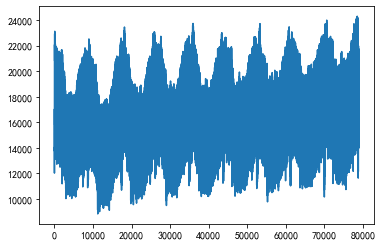

In [13]:
PL_data['load'].plot()

<AxesSubplot:>

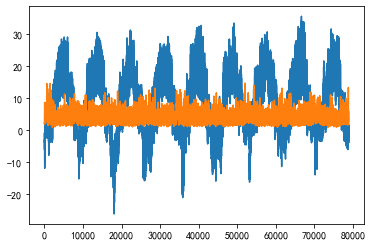

In [14]:
PL_data['temperature'].plot()
PL_data['windspeed'].plot()